# Imports

In [980]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, MinMaxScaler
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn import metrics
matplotlib.rcParams['figure.figsize'] = (10, 4)

In [981]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


# Exploratory Data Analysis

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [983]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

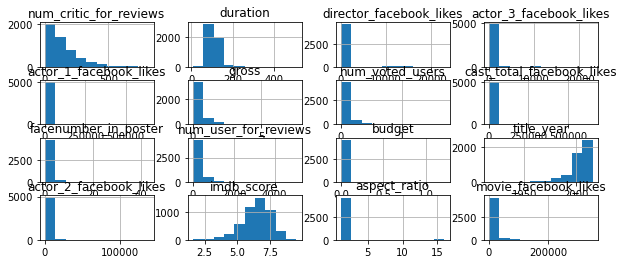

In [984]:
df.hist()

In [985]:
df.isna().sum() / len(df) * 100

director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score                    0.000000
aspect_ratio             

In [986]:
df = df[df["num_critic_for_reviews"].notna()]
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


# Preprocess Data

In [987]:
y = df["num_critic_for_reviews"]
X = df[df.columns.difference(["num_critic_for_reviews"])]
X

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,content_rating,...,gross,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1000.0,CCH Pounder,936.0,Joel David Moore,855.0,Wes Studi,1.78,237000000.0,4834,PG-13,...,760505847.0,7.9,English,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
1,40000.0,Johnny Depp,5000.0,Orlando Bloom,1000.0,Jack Davenport,2.35,300000000.0,48350,PG-13,...,309404152.0,7.1,English,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0
2,11000.0,Christoph Waltz,393.0,Rory Kinnear,161.0,Stephanie Sigman,2.35,245000000.0,11700,PG-13,...,200074175.0,6.8,English,85000,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Spectre,994.0,275868,bomb|espionage|sequel|spy|terrorist,2015.0
3,27000.0,Tom Hardy,23000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,2.35,250000000.0,106759,PG-13,...,448130642.0,8.5,English,164000,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The Dark Knight Rises,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,2012.0
5,640.0,Daryl Sabara,632.0,Samantha Morton,530.0,Polly Walker,2.35,263700000.0,1873,PG-13,...,73058679.0,6.6,English,24000,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,John Carter,738.0,212204,alien|american civil war|male nipple|mars|prin...,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,637.0,Eric Mabius,470.0,Daphne Zuniga,318.0,Crystal Lowe,NaN,NaN,2283,NaN,...,NaN,7.7,English,84,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,Signed Sealed Delivered,6.0,629,fraud|postal worker|prison|theft|trial,2013.0
5039,841.0,Natalie Zea,593.0,Valorie Curry,319.0,Sam Underwood,16.00,NaN,1753,TV-14,...,NaN,7.5,English,32000,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,The Following,359.0,73839,cult|fbi|hideout|prison escape|serial killer,NaN
5040,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,NaN,1400.0,0,NaN,...,NaN,6.3,English,16,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,A Plague So Pleasant,3.0,38,NaN,2013.0
5041,946.0,Alan Ruck,719.0,Daniel Henney,489.0,Eliza Coupe,2.35,NaN,2386,PG-13,...,10443.0,6.3,English,660,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,Shanghai Calling,9.0,1255,NaN,2012.0


In [988]:
X.isna().sum()

actor_1_facebook_likes         6
actor_1_name                   6
actor_2_facebook_likes        11
actor_2_name                  11
actor_3_facebook_likes        19
actor_3_name                  19
aspect_ratio                 294
budget                       473
cast_total_facebook_likes      0
content_rating               274
country                        2
director_facebook_likes       99
director_name                 99
duration                      11
facenumber_in_poster          12
genres                         0
gross                        837
imdb_score                     0
language                      10
movie_facebook_likes           0
movie_imdb_link                0
movie_title                    0
num_user_for_reviews           0
num_voted_users                0
plot_keywords                130
title_year                    99
dtype: int64

### Fill missing values

Percentage of mising values

In [989]:
X.isna().sum() / X.shape[0] * 100

actor_1_facebook_likes        0.120168
actor_1_name                  0.120168
actor_2_facebook_likes        0.220308
actor_2_name                  0.220308
actor_3_facebook_likes        0.380533
actor_3_name                  0.380533
aspect_ratio                  5.888244
budget                        9.473263
cast_total_facebook_likes     0.000000
content_rating                5.487683
country                       0.040056
director_facebook_likes       1.982776
director_name                 1.982776
duration                      0.220308
facenumber_in_poster          0.240336
genres                        0.000000
gross                        16.763469
imdb_score                    0.000000
language                      0.200280
movie_facebook_likes          0.000000
movie_imdb_link               0.000000
movie_title                   0.000000
num_user_for_reviews          0.000000
num_voted_users               0.000000
plot_keywords                 2.603645
title_year               

Missing values seems to be minimal, resolving missing values by substituting would be the best option

In [990]:
def fillNumericalNaN(X):
  X_copy = X.copy()
  for col in X_copy.columns[X_copy.isnull().any(axis=0)]:
    if(X_copy.dtypes[col] == np.number):
      X_copy[col].fillna(X_copy[col].mean(),inplace=True)
  return X_copy
X = fillNumericalNaN(X)
X.isna().sum()

<ipython-input-990-6be8570af308>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if(X_copy.dtypes[col] == np.number):


actor_1_facebook_likes         0
actor_1_name                   6
actor_2_facebook_likes         0
actor_2_name                  11
actor_3_facebook_likes         0
actor_3_name                  19
aspect_ratio                   0
budget                         0
cast_total_facebook_likes      0
content_rating               274
country                        2
director_facebook_likes        0
director_name                 99
duration                       0
facenumber_in_poster           0
genres                         0
gross                          0
imdb_score                     0
language                      10
movie_facebook_likes           0
movie_imdb_link                0
movie_title                    0
num_user_for_reviews           0
num_voted_users                0
plot_keywords                130
title_year                     0
dtype: int64

Hand pick filling string values

In [991]:
def fill_string(X):
  X_copy = X.copy()
  columns = X_copy.select_dtypes(include="object")
  for col in columns:
    X_copy[col].fillna(X_copy[col].value_counts().index[0], inplace=True)
  return X_copy
X = fill_string(X)
X.isna().sum()

actor_1_facebook_likes       0
actor_1_name                 0
actor_2_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
actor_3_name                 0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
country                      0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
genres                       0
gross                        0
imdb_score                   0
language                     0
movie_facebook_likes         0
movie_imdb_link              0
movie_title                  0
num_user_for_reviews         0
num_voted_users              0
plot_keywords                0
title_year                   0
dtype: int64

### Drop features

#### Dropping unnecessary columns such as imdb link, names

In [992]:
X = X.drop([
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title"
], axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
imdb_score                   float64
language                      object
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

Lets take a look at some interesting features

#### Language

In [993]:
value_counts = X["language"].value_counts()
value_counts

English       4668
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Italian         11
Russian         11
Cantonese       11
Portuguese       8
Korean           8
Hebrew           5
Danish           5
Arabic           4
Dutch            4
Polish           4
Swedish          4
Persian          4
Norwegian        4
Thai             3
Chinese          3
Romanian         2
Icelandic        2
Zulu             2
Indonesian       2
None             2
Dari             2
Aboriginal       2
Bosnian          1
Vietnamese       1
Telugu           1
Swahili          1
Maya             1
Slovenian        1
Urdu             1
Panjabi          1
Greek            1
Mongolian        1
Dzongkha         1
Tamil            1
Kazakh           1
Kannada          1
Hungarian        1
Czech            1
Aramaic          1
Filipino         1
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='count'>

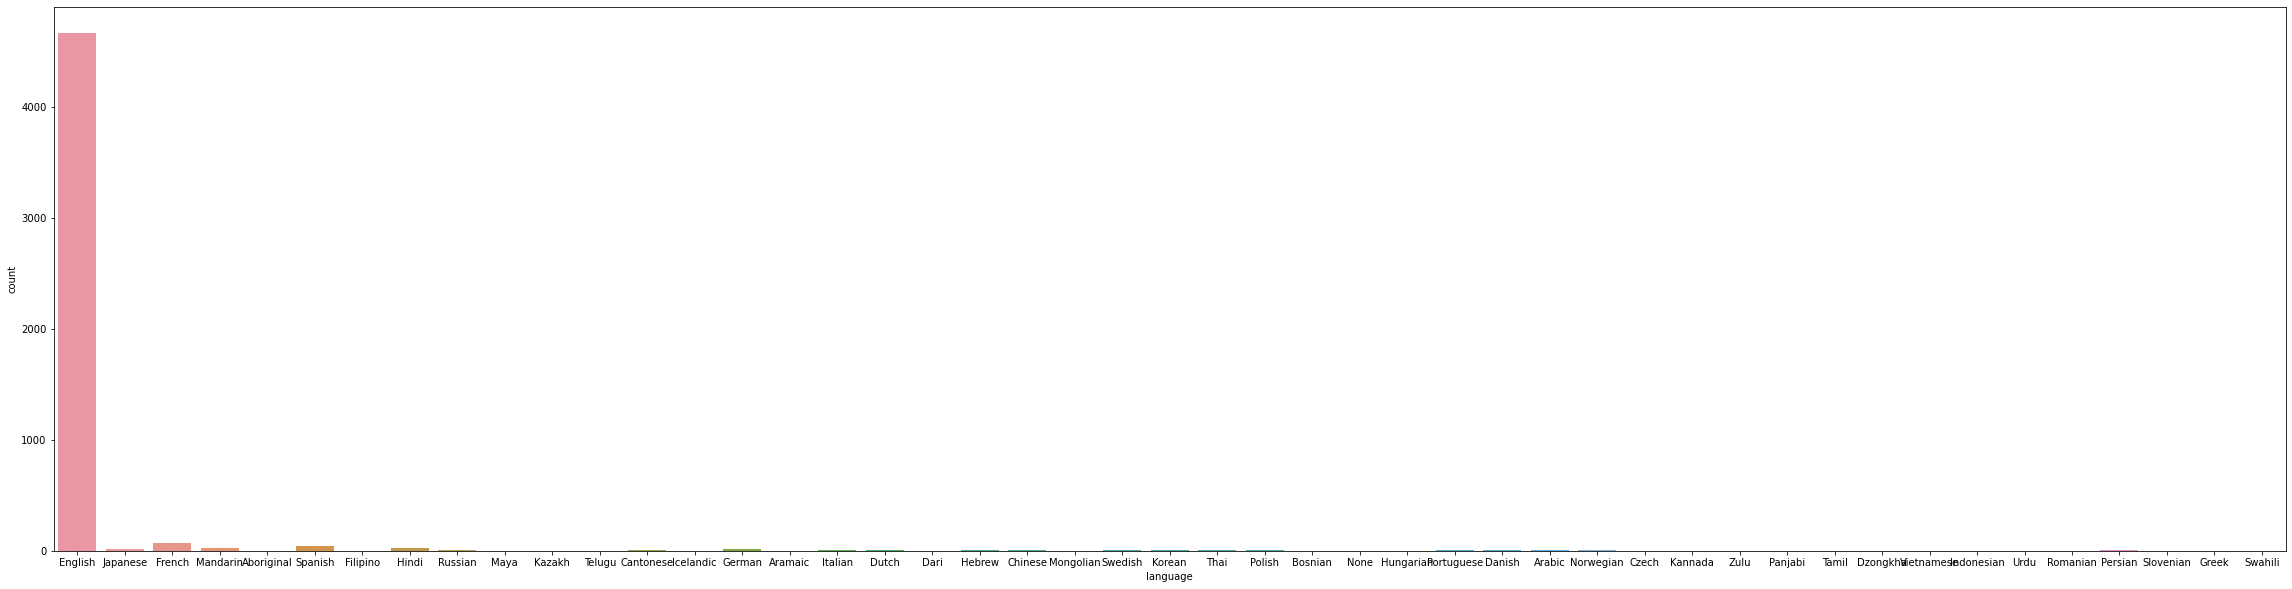

In [994]:
plt.figure(figsize=(40,10))
sns.countplot(x="language", data=X)

View columns in percentage

In [995]:
X['language'].value_counts(normalize=True) * 100

English       93.490887
French         1.462047
Spanish        0.801122
Hindi          0.560785
Mandarin       0.520729
German         0.380533
Japanese       0.360505
Italian        0.220308
Russian        0.220308
Cantonese      0.220308
Portuguese     0.160224
Korean         0.160224
Hebrew         0.100140
Danish         0.100140
Arabic         0.080112
Dutch          0.080112
Polish         0.080112
Swedish        0.080112
Persian        0.080112
Norwegian      0.080112
Thai           0.060084
Chinese        0.060084
Romanian       0.040056
Icelandic      0.040056
Zulu           0.040056
Indonesian     0.040056
None           0.040056
Dari           0.040056
Aboriginal     0.040056
Bosnian        0.020028
Vietnamese     0.020028
Telugu         0.020028
Swahili        0.020028
Maya           0.020028
Slovenian      0.020028
Urdu           0.020028
Panjabi        0.020028
Greek          0.020028
Mongolian      0.020028
Dzongkha       0.020028
Tamil          0.020028
Kazakh         0

English accounts for 93.5%, this data is unusable since it's heavily skewed. Dropping this data is the best option

In [996]:
X = X.drop("language", axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Country

In [997]:
value_counts = X["country"].value_counts()
value_counts

USA         3770
UK           446
France       154
Canada       125
Germany       97
            ... 
Slovakia       1
Bulgaria       1
Pakistan       1
Slovenia       1
Libya          1
Name: country, Length: 63, dtype: int64

In [998]:
value_counts = X["country"].value_counts() / X.shape[0] * 100
value_counts

USA         75.505708
UK           8.932506
France       3.084318
Canada       2.503505
Germany      1.942720
              ...    
Slovakia     0.020028
Bulgaria     0.020028
Pakistan     0.020028
Slovenia     0.020028
Libya        0.020028
Name: country, Length: 63, dtype: float64

<AxesSubplot:xlabel='country', ylabel='count'>

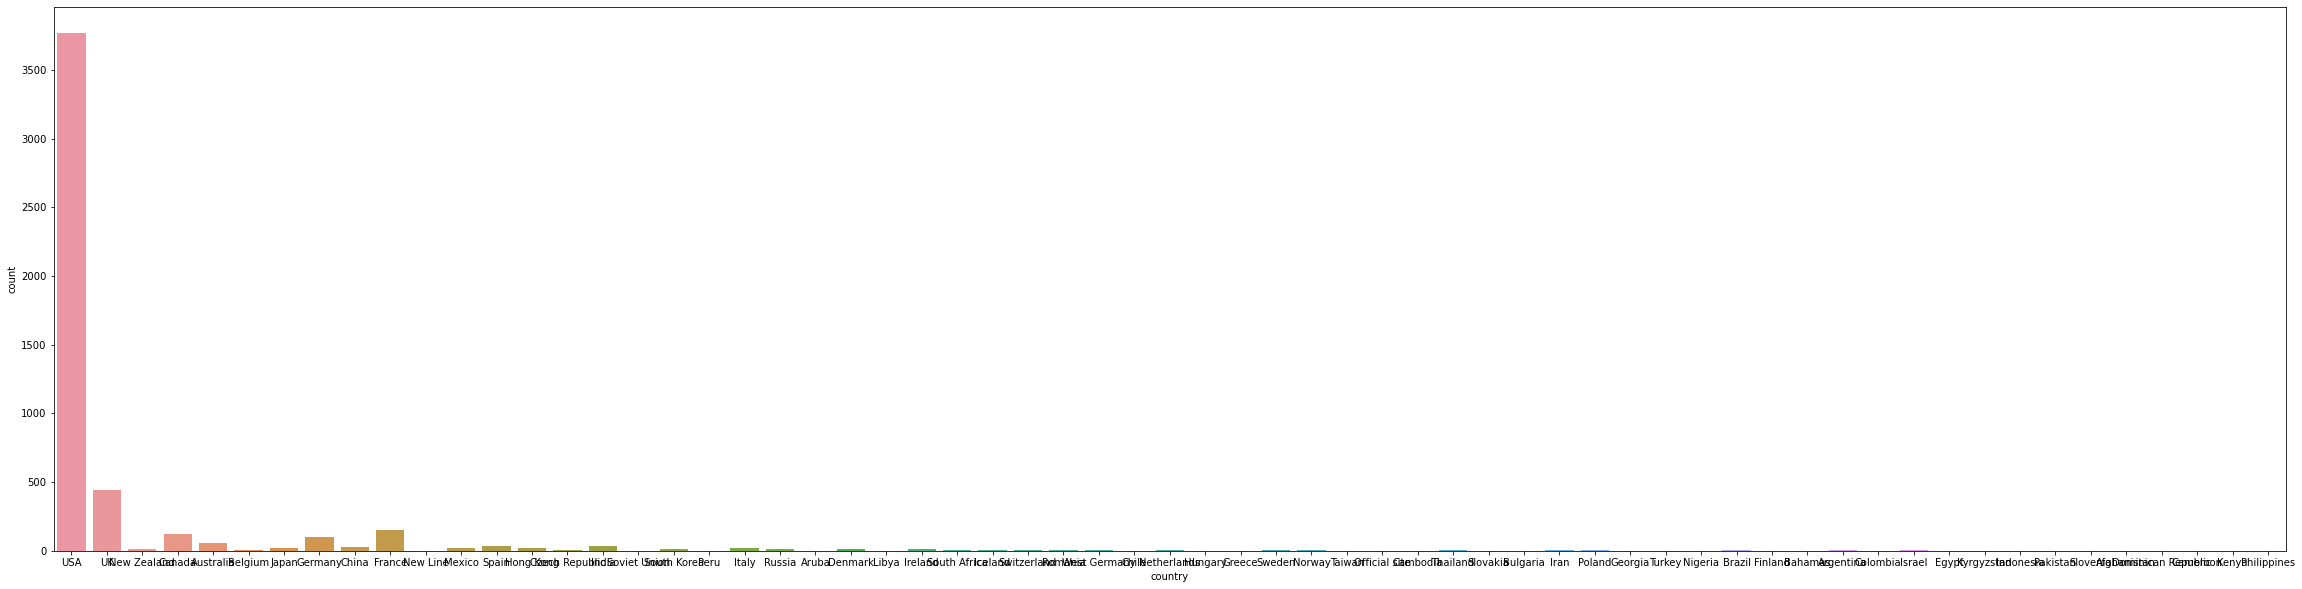

In [999]:
plt.figure(figsize=(40,10))
sns.countplot(x="country", data=X)

The 3 dominant countries are USA, UK, and France. Other countries should be recognized as "other" as it's less relevant than the 3

In [1000]:
def process_country(X):
  top_three = ["USA","UK","France"]
  X["country"] = X["country"].where(X["country"].isin(top_three), "others")
  return X
X = process_country(X)
X

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,country,director_facebook_likes,duration,facenumber_in_poster,genres,gross,imdb_score,movie_facebook_likes,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1000.0,936.0,855.0,1.780000,2.370000e+08,4834,PG-13,USA,0.000000,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,7.605058e+08,7.9,33000,3054.0,886204,avatar|future|marine|native|paraplegic,2009.000000
1,40000.0,5000.0,1000.0,2.350000,3.000000e+08,48350,PG-13,USA,563.000000,169.0,0.0,Action|Adventure|Fantasy,3.094042e+08,7.1,0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.000000
2,11000.0,393.0,161.0,2.350000,2.450000e+08,11700,PG-13,UK,0.000000,148.0,1.0,Action|Adventure|Thriller,2.000742e+08,6.8,85000,994.0,275868,bomb|espionage|sequel|spy|terrorist,2015.000000
3,27000.0,23000.0,23000.0,2.350000,2.500000e+08,106759,PG-13,USA,22000.000000,164.0,0.0,Action|Thriller,4.481306e+08,8.5,164000,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,2012.000000
5,640.0,632.0,530.0,2.350000,2.637000e+08,1873,PG-13,USA,475.000000,132.0,1.0,Action|Adventure|Sci-Fi,7.305868e+07,6.6,24000,738.0,212204,alien|american civil war|male nipple|mars|prin...,2012.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,637.0,470.0,318.0,2.219176,4.000575e+07,2283,R,others,2.000000,87.0,2.0,Comedy|Drama,4.850331e+07,7.7,84,6.0,629,fraud|postal worker|prison|theft|trial,2013.000000
5039,841.0,593.0,319.0,16.000000,4.000575e+07,1753,TV-14,USA,692.561095,43.0,1.0,Crime|Drama|Mystery|Thriller,4.850331e+07,7.5,32000,359.0,73839,cult|fbi|hideout|prison escape|serial killer,2002.407029
5040,0.0,0.0,0.0,2.219176,1.400000e+03,0,R,USA,0.000000,76.0,0.0,Drama|Horror|Thriller,4.850331e+07,6.3,16,3.0,38,1940s|child hero|fantasy world|orphan|referenc...,2013.000000
5041,946.0,719.0,489.0,2.350000,4.000575e+07,2386,PG-13,USA,0.000000,100.0,5.0,Comedy|Drama|Romance,1.044300e+04,6.3,660,9.0,1255,1940s|child hero|fantasy world|orphan|referenc...,2012.000000


#### Genres

<AxesSubplot:xlabel='genres', ylabel='count'>

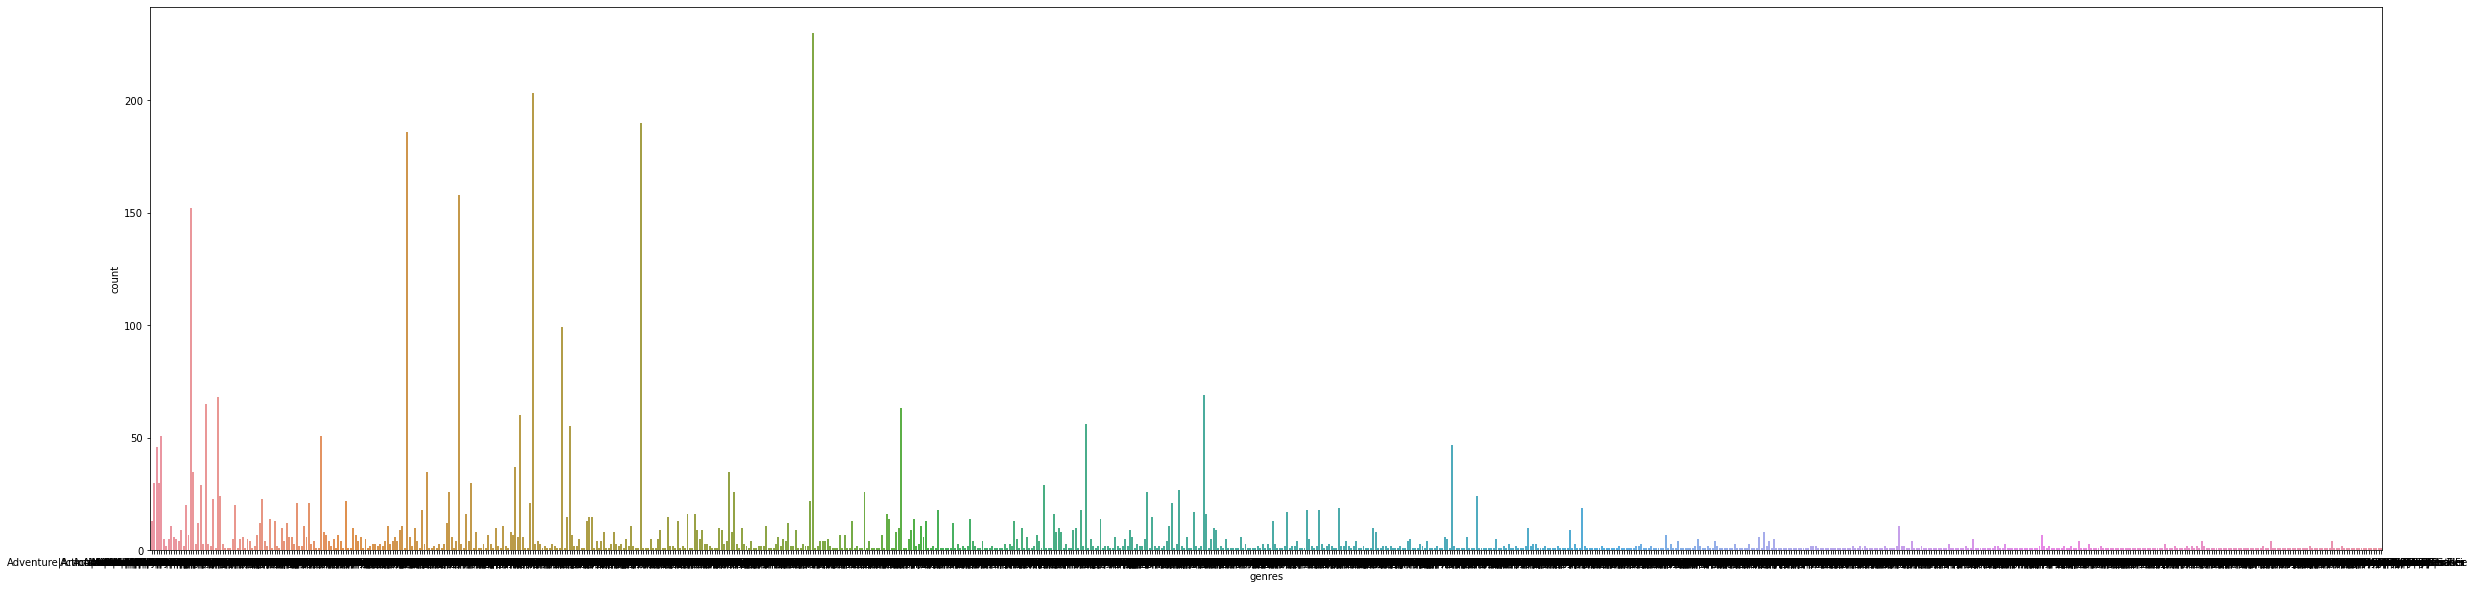

In [1001]:
plt.figure(figsize=(40,10))
sns.countplot(x=X.genres) 

Genres are too complicated and interconnected, dropping this data as for right now

In [1002]:
X = X.drop("genres", axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Content Rating

In [1003]:
value_counts = X["content_rating"].value_counts() / X.shape[0] * 100
value_counts

R            47.846986
PG-13        29.080713
PG           14.039656
Not Rated     2.283196
G             2.223112
Unrated       1.181654
Approved      1.101542
TV-14         0.580813
TV-MA         0.400561
X             0.260365
TV-PG         0.220308
TV-G          0.200280
Passed        0.180252
NC-17         0.140196
GP            0.120168
M             0.100140
TV-Y          0.020028
TV-Y7         0.020028
Name: content_rating, dtype: float64

<AxesSubplot:xlabel='content_rating', ylabel='count'>

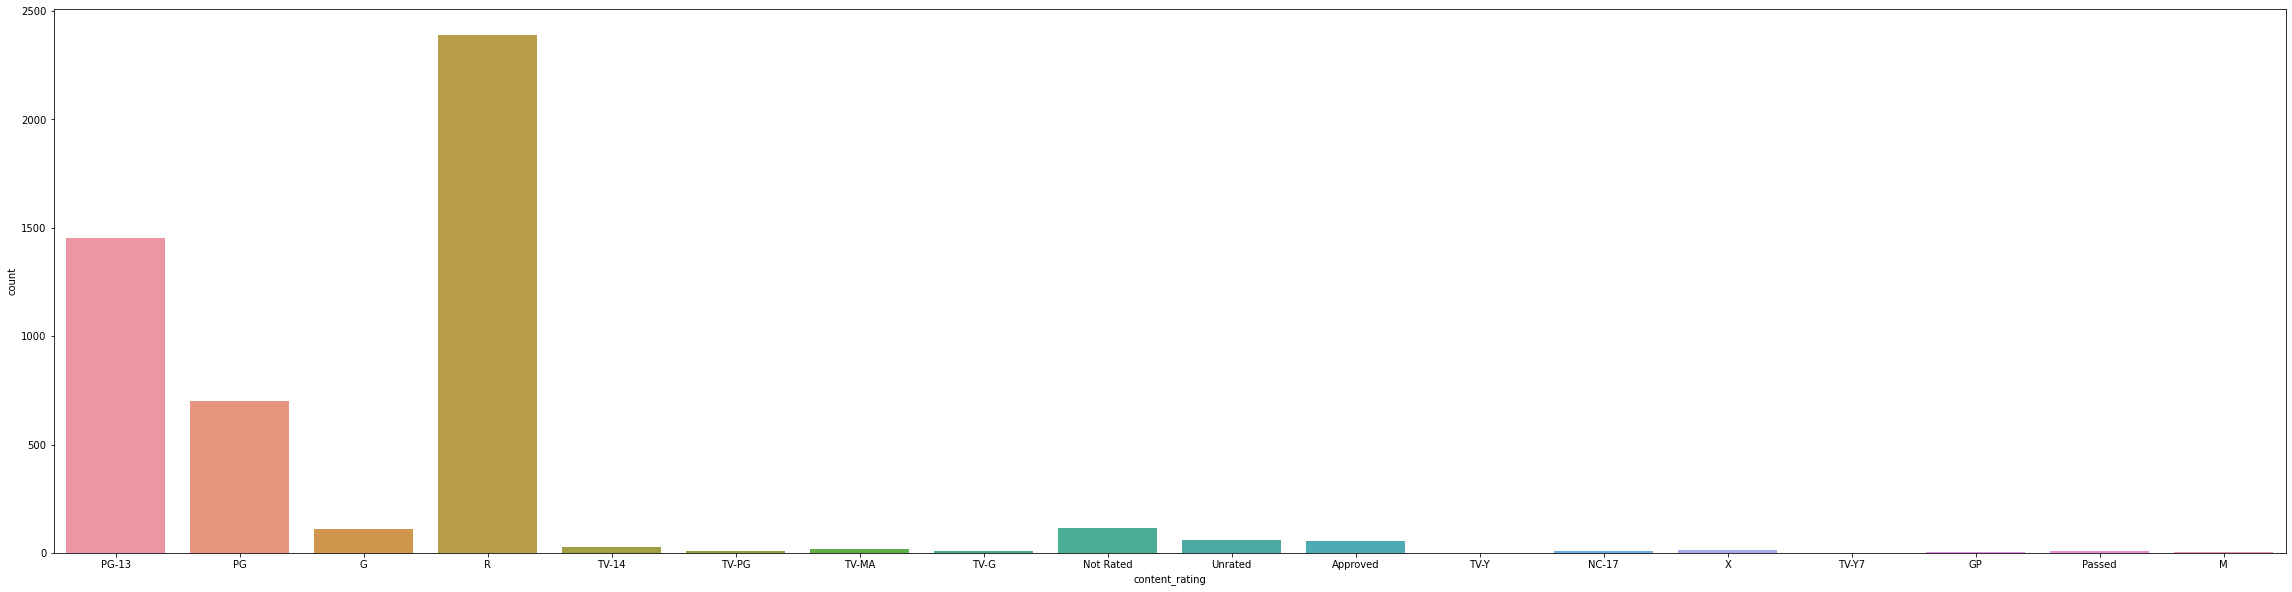

In [1004]:
plt.figure(figsize=(40,10))
sns.countplot(x="content_rating", data=X)

R, PG, PG-13 are the 3 most dominant values in rating. Group the rest as "others"

In [1005]:
def process_content_rating(X):
  top_three = ["R","PG"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X = process_content_rating(X)
X["content_rating"]

0       others
1       others
2       others
3       others
5       others
         ...  
5038         R
5039    others
5040         R
5041    others
5042        PG
Name: content_rating, Length: 4993, dtype: object

In [1006]:
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Plot keywords

In [1007]:
value_counts = X["plot_keywords"].value_counts()
value_counts

1940s|child hero|fantasy world|orphan|reference to peter pan                         133
based on novel                                                                         3
one word title                                                                         3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop                    3
alien friendship|alien invasion|australia|flying car|mother daughter relationship      3
                                                                                    ... 
allies|bridge|construction|jungle|sabotage                                             1
anthology|girl|heavy metal|secretary|segments                                          1
female pubic hair|girl in panties|leg spreading|public nudity|sex in bed               1
evil queen|fairy tale|magic|queen|snow white                                           1
co worker|game tester|loss of virginity|roommate|snack                                 1
Name: plot_keywords, 

In [1008]:
#sns.countplot(x="plot_keywords", data=X)

Same as genres, data is too complex and interconnected. Dropping this value

In [1009]:
X = X.drop("plot_keywords", axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
title_year                   float64
dtype: object

### Correlation

<AxesSubplot:>

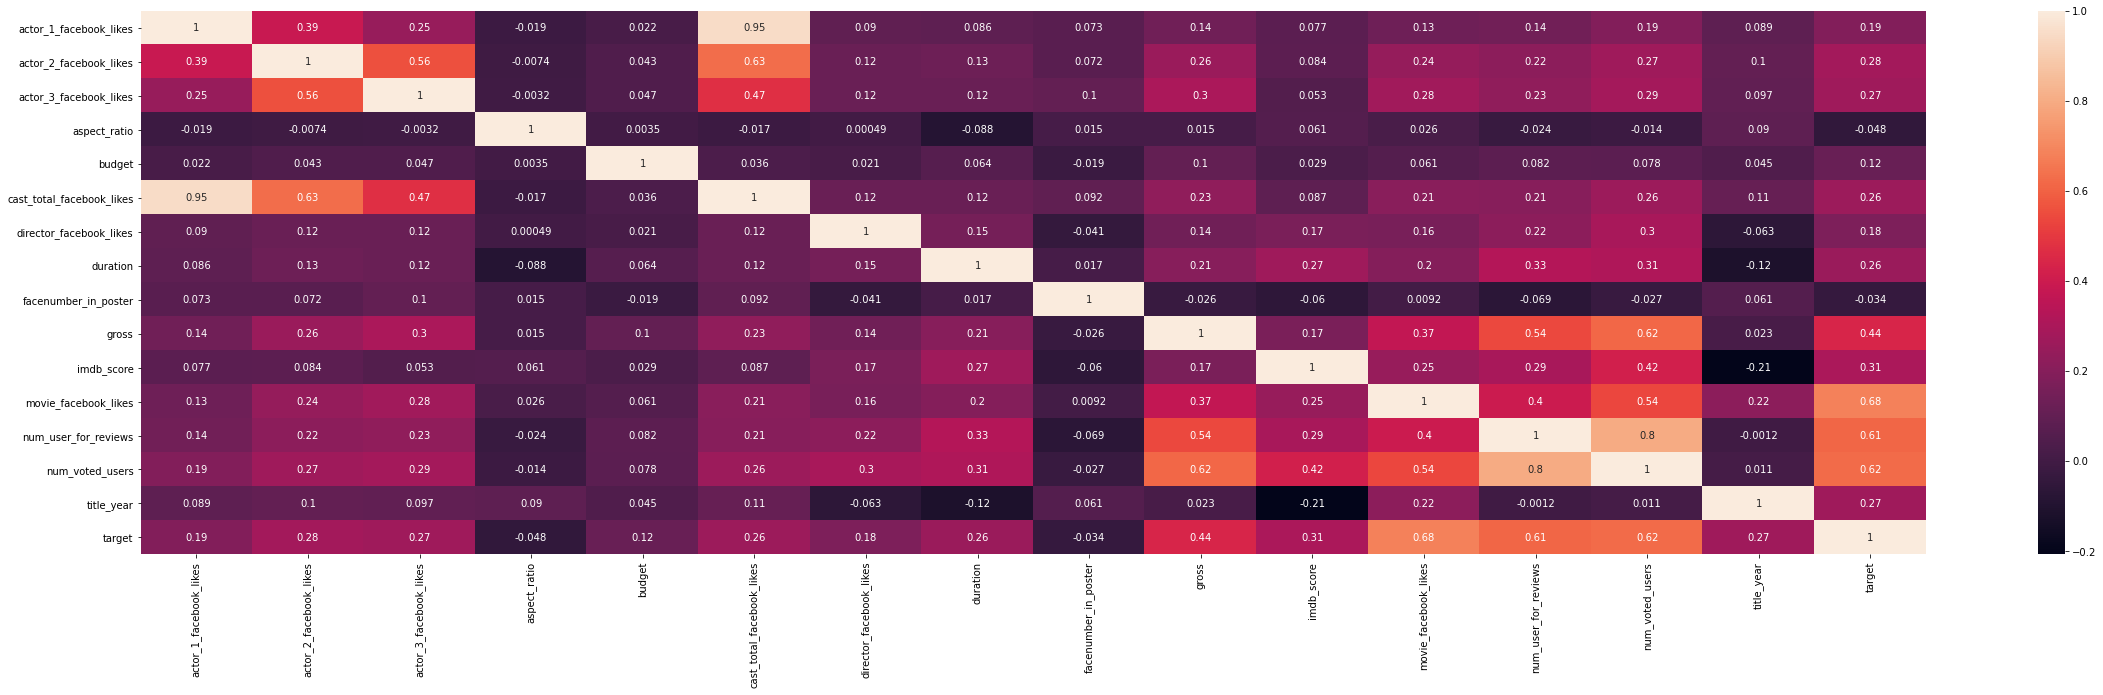

In [1010]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

From the heatmap, a number of insights that were gained were
- Cast total facebook likes and number of likes of actor 1 are highly correlated (0.94)
- Number of likes of actor 2 and 3 are somewhat correlated (0.5)
- Total facebook likes of actor are the representative of number of likes of actor 1,2,3

Drop actor 1,2,3 and keep the total actor facebook likes

In [1011]:
X.drop("actor_1_facebook_likes", axis=1, inplace=True)
X.drop("actor_2_facebook_likes", axis=1, inplace=True)
X.drop("actor_3_facebook_likes", axis=1, inplace=True)

<AxesSubplot:>

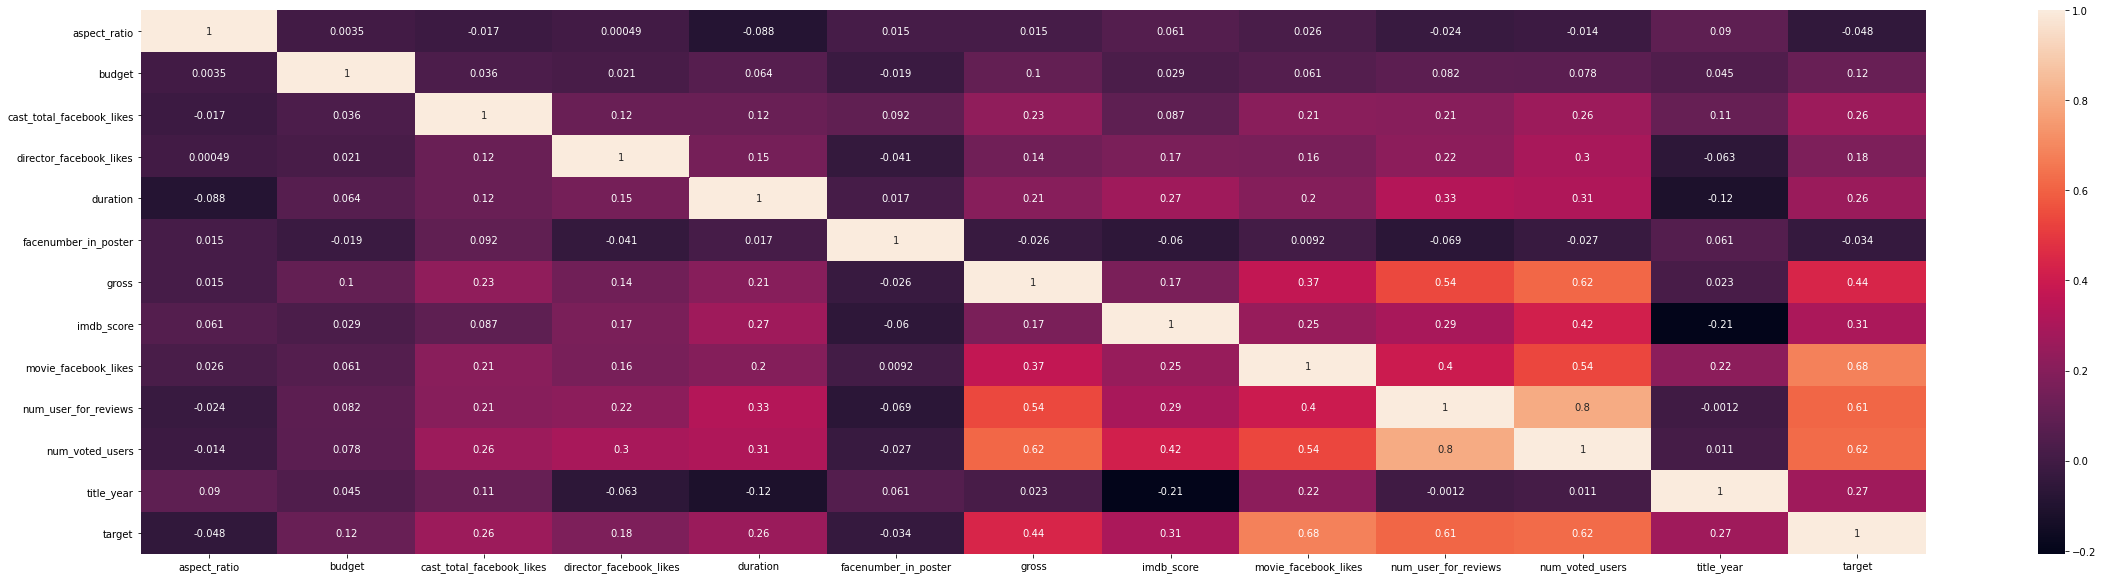

In [1012]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Encoding

#### Integer to Float

In [1013]:
def int_to_float(X):
    X_copy = X.copy()
    int_cols = X_copy.select_dtypes(include=["int"]).columns
    X_copy[int_cols] = X_copy[int_cols].apply(lambda x: x.astype("float"))
    return X_copy
X = int_to_float(X)
X.dtypes


aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes         float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

#### String to One-hot

In [1014]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X = one_hot_encode(X)
X.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes         float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
content_rating_PG              uint8
content_rating_R               uint8
content_rating_others          uint8
country_France                 uint8
country_UK                     uint8
country_USA                    uint8
country_others                 uint8
dtype: object

In [1015]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(np.array(X.values, dtype=float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features   VIF
18             country_others   inf
17                country_USA   inf
16                 country_UK   inf
15             country_France   inf
14      content_rating_others   inf
13           content_rating_R   inf
12          content_rating_PG   inf
10            num_voted_users  4.20
9        num_user_for_reviews  2.91
6                       gross  1.86
8        movie_facebook_likes  1.55
7                  imdb_score  1.41
11                 title_year  1.22
4                    duration  1.21
2   cast_total_facebook_likes  1.13
3     director_facebook_likes  1.12
5        facenumber_in_poster  1.03
0                aspect_ratio  1.03
1                      budget  1.02


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

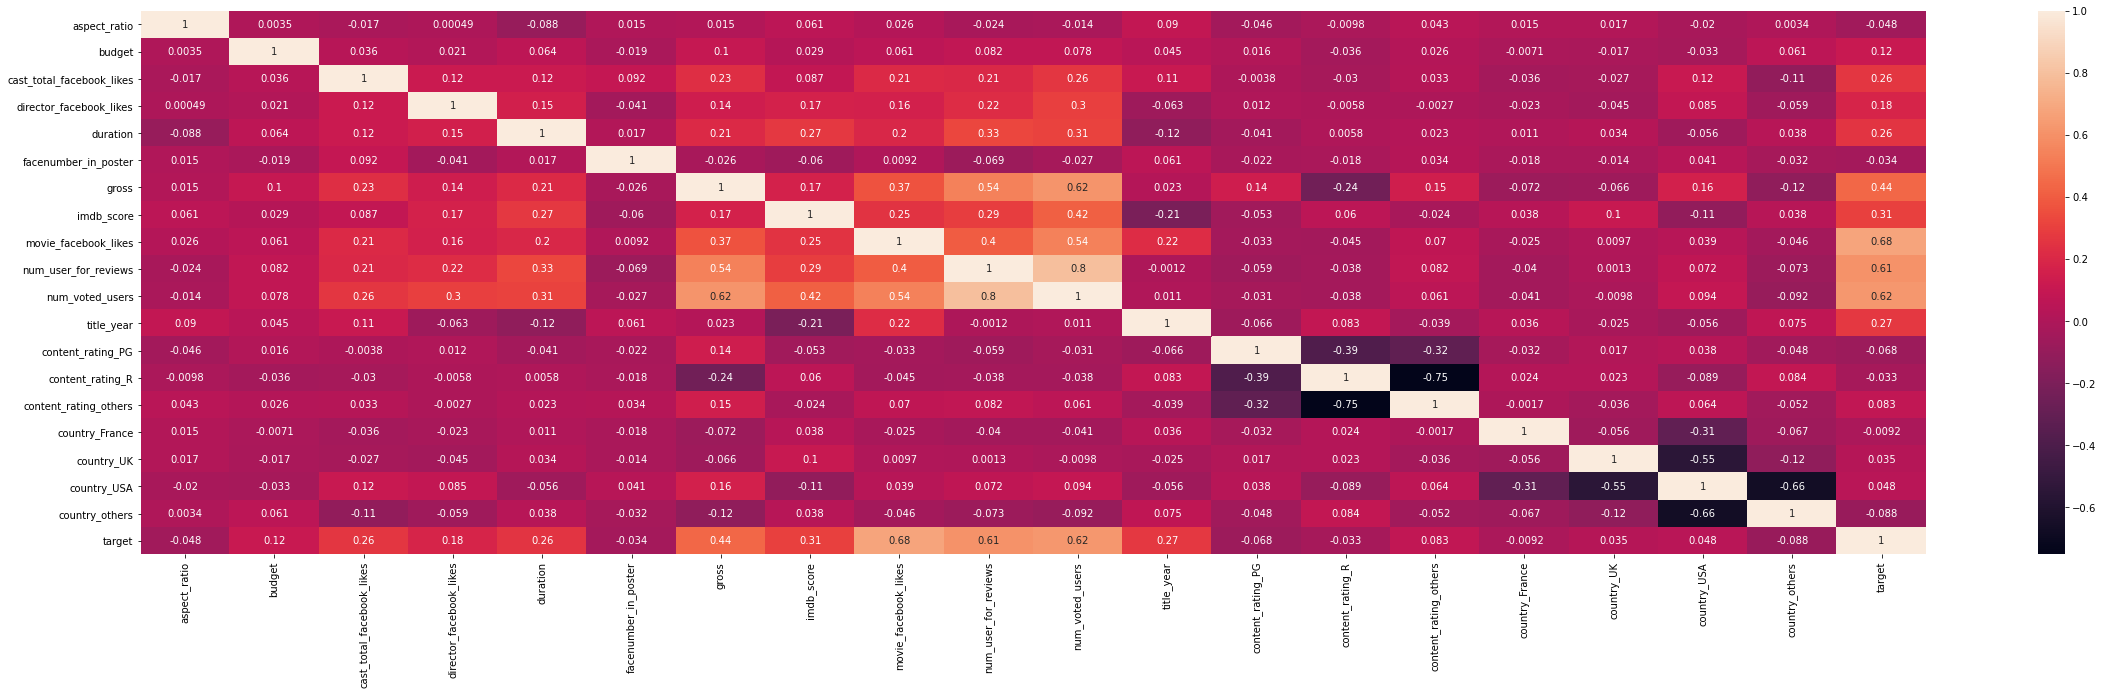

In [1016]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

#### Split train test

In [1017]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_user_for_reviews,num_voted_users,title_year,content_rating_PG,content_rating_R,content_rating_others,country_France,country_UK,country_USA,country_others
699,2.35,6.200000e+07,14178.0,176.0,141.0,1.0,1.220127e+08,6.9,0.0,133.0,69663.0,1994.0,0,0,1,0,0,1,0
4280,1.85,2.000000e+06,901.0,85.0,98.0,1.0,7.369373e+06,5.7,0.0,74.0,4288.0,1986.0,0,1,0,0,1,0,0
190,2.35,1.300000e+08,12954.0,0.0,147.0,1.0,1.383966e+08,6.6,0.0,511.0,178126.0,2003.0,0,1,0,0,0,1,0
1970,2.35,2.500000e+07,3757.0,425.0,110.0,1.0,2.883114e+07,6.8,14000.0,113.0,39357.0,2014.0,0,1,0,0,0,1,0
40,2.35,1.700000e+08,25550.0,364.0,125.0,0.0,1.720518e+08,6.8,30000.0,665.0,264183.0,2010.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,1.85,5.000000e+06,3942.0,3.0,150.0,1.0,6.157157e+06,7.0,0.0,198.0,21416.0,1989.0,0,0,1,0,0,1,0
4678,1.85,4.000575e+07,548.0,15.0,89.0,1.0,7.705974e+06,7.5,614.0,8.0,3543.0,2011.0,0,1,0,0,0,1,0
2293,2.35,2.000000e+07,3309.0,0.0,111.0,0.0,9.525276e+06,6.8,0.0,299.0,60156.0,2007.0,0,1,0,0,0,1,0
4022,2.35,3.440000e+06,1183.0,0.0,90.0,1.0,4.850331e+07,3.1,606.0,18.0,610.0,2014.0,0,1,0,0,1,0,0


### Normalization

In [1018]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm

array([[7.89473684e-02, 5.07550105e-03, 2.15887808e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.52091768e-02, 1.63708570e-04, 1.37194890e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.89473684e-02, 1.06421992e-02, 1.97250011e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [7.89473684e-02, 1.63724631e-03, 5.03860034e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.89473684e-02, 2.81591589e-04, 1.80134911e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.89473684e-02, 1.63724631e-03, 4.20111766e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

# Model

In [1019]:
lr = LinearRegression()
lr.fit(X_train_norm, y_train)

LinearRegression()

In [1020]:
y_train_pred=pd.DataFrame(lr.predict(X_train_norm))
y_test_pred=pd.DataFrame(lr.predict(X_test_norm))

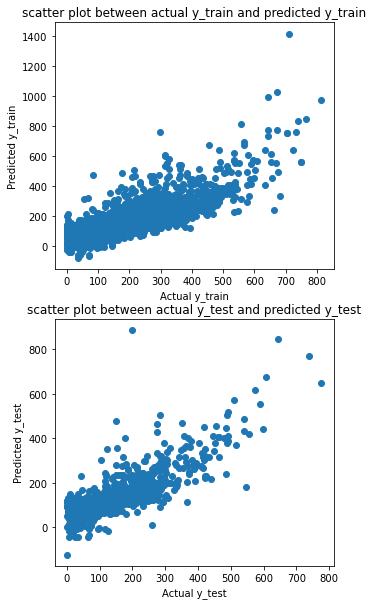

In [1021]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))
ax1.scatter(y_train,y_train_pred)
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and predicted y_train')
ax2.scatter(y_test,y_test_pred)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
plt.show()

In [1022]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-13-1))

mae : 51.75775775775776
mse : 5029.615615615616
mape : 2.519476380469484
r2 : 0.6464310765484337
Adjusted r2 : 0.6417646846653166


# Hyperparameter Tuning

In [1023]:
a=['constant', 'optimal', 'invscaling']
c = [0.00001,0.0001,0.001,0.01,0.1] 
param_grid = dict(learning_rate=a,eta0=c)
clf=SGDRegressor(max_iter=50000, tol=1e-3)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error') 
grid_result = grid.fit(X_train_norm, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_)

In [ ]:
y_test_pred=grid.predict(X_test_norm)
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-13-1))


mape : 1.857839260762527
r2 : -0.2866179717733366
Adjusted r2 : -0.30359871657846704
